# Ripley's K Demo: 01 Point Process Simulation
* Before demonstrating Ripley's K function ($K(t)$, $L(t)$, and $H(t)$), I have to first simulate two types of point process: 1. Poisson point process and 2. Thomas point process. 
* The point process generator is adpated from Connor Johnson's blog post. 
* The default size of point process generator is 20 x 20
* Please visit the code on my [GitHub](https://github.com/eufmike/Ripleys_K_function_demo)

In [1]:
# denpendency 
import os, sys
import scipy.stats
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import spatialstat.ppsim as ppsim
%load_ext autoreload
%autoreload 2

In [2]:
# define IO dir
path = '.'
opdir = os.path.join(path, 'output')
opdir_csv = os.path.join(opdir, 'csv')
opdir_fig = os.path.join(opdir, 'figure')

if not os.path.exists(opdir):
    os.makedirs(opdir)
if not os.path.exists(opdir_csv):
    os.makedirs(opdir_csv)
if not os.path.exists(opdir_fig):
    os.makedirs(opdir_fig)       
 
print(opdir)
print(opdir_csv)
print(opdir_fig)

./output
./output/csv
./output/figure


## Poisson Point Process
1. Create Poisson PP by `ppsim.PoissonPP`. Please visit the code on my [GitHub](https://github.com/eufmike/Ripleys_K_function_demo)
2. export to *.csv

In [3]:
# Set seed
seed = 2020
rate = 1
Dx = 20

# set data range
xmin = 0 
xmax = Dx
ymin = 0
ymax = Dx

P_PoissonPP = ppsim.PoissonPP(rt = rate, seed = seed)
# calculate density
P_PoissonPP_density = ppsim.xydensity(P_PoissonPP)

# save to csv
filename = 'P_PoissonPP_' + str(Dx)
outputpath = os.path.join(opdir_csv, filename + '.csv')
df = pd.DataFrame(P_PoissonPP, columns = ['x', 'y']) 
df.to_csv(outputpath, index = False)

print("Size of the PoissonPP array: {}".format(P_PoissonPP.shape))
print("Density the PoissonPP array: {}".format(P_PoissonPP_density[0]))

Size of the PoissonPP array: (400, 2)
Density the PoissonPP array: 1.0071393751427509


## Thomas Point Process
1. Create Thomas PP from given parent points generated from Poison PP
2. Create Thomas PP by `ppsim.ThomasPP`. Please visit the code on my [GitHub](https://github.com/eufmike/Ripleys_K_function_demo)
2. export to *.csv

In [4]:
# Set seed
seed = 1219
rate = 0.1
Dx = 20

# create parent points
P_parent = ppsim.PoissonPP(rt = rate, seed = seed)
print("Size of the P_parent array: {}".format(P_parent.shape))

Size of the P_parent array: (39, 2)


In [5]:
# create children points
sigma = 0.3
mu = 50
P_children, P_parent = ppsim.ThomasPP(rt = rate,
                                sigma = sigma, mu = mu, seed = seed)
# reduce data to region of interest
xmin = 0 
xmax = Dx
ymin = 0
ymax = Dx

# crop data and calculate density
P_ThomasPP = ppsim.xyroi(P_children, xmin, xmax, ymin, ymax)
P_ThomasPP_density = ppsim.xydensity(P_ThomasPP) 

# save to csv
filename = 'P_ThomasPP_20'
outputpath = os.path.join(opdir_csv, filename + '.csv')
df = pd.DataFrame(P_ThomasPP, columns = ['x', 'y']) 
df.to_csv(outputpath, index = False)

print("Size of the ThomasPP array: {}".format(P_ThomasPP.shape))
print("Density the ThomasPP array: {}".format(P_ThomasPP_density[0]))

0 20 0 20
Size of the ThomasPP array: (1898, 2)
Density the ThomasPP array: 5.359077104022789


## Plot Posison and Thomas PP 

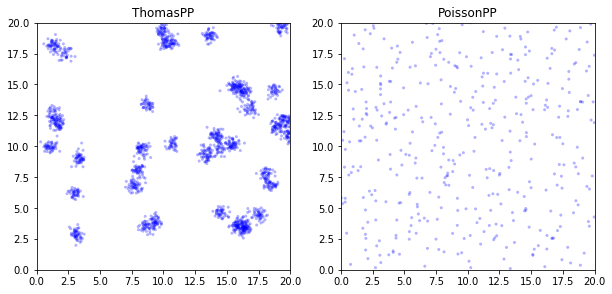

In [6]:
# set figure size
plt.figure(figsize= (10, 10))
plotsize_x = 20.0
plotsize_y = 20.0

# subplot 1
plot_1 = plt.subplot(221)
plot_1.scatter(P_children[:, 0], P_children[:, 1], 
                color = 'b', edgecolors = 'none', marker = '.', alpha =0.3)
plot_1.set_title('ThomasPP')
plot_1.set_xlim([0,20])
plot_1.set_ylim([0,20])

# subplot 2
plot_2 = plt.subplot(222)
plot_2.scatter(P_PoissonPP[:, 0], P_PoissonPP[:, 1], 
                color = 'b', edgecolors = 'none', marker = '.', alpha =0.3)
plot_2.set_title('PoissonPP')
plot_2.set_xlim([0,20])
plot_2.set_ylim([0,20])

# save figure
filename = 'Point_Process_20'
outputpath = os.path.join(opdir_fig, filename + '.png')
plt.savefig(outputpath)

plt.show()
